# Rotating Coild Data Analysis for BO Sextupole Magnets

## Import libraries and Load measurement data

In [2]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [3]:
# Define serial numbers, one for each magnet

serials_sf = [
    '007', 
    '008', '010', # different max current
    '012', '013', '014', '015', '016', '017', '018', 
    '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', 
    '029', '030', '031', '032', '033', 
]

serials_sd = [
    '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', 
]

serials_unusued = [
    '009', # different max current
    '011'
]

serials = sorted(serials_sf + serials_sd + serials_unusued)


# Load all data
RotCoilMeas_BOSext.family_folder = ''
data = MagnetsAnalysis(RotCoilMeas_BOSext, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 007, data sets: ['M2', 'M3']
index: 01, serial_number: 008, data sets: ['M2', 'M1', 'M3']
index: 02, serial_number: 009, data sets: ['M2', 'M1', 'M3']
index: 03, serial_number: 010, data sets: ['M2', 'M1', 'M3']
index: 04, serial_number: 011, data sets: ['M2', 'M1', 'M3']
index: 05, serial_number: 012, data sets: ['M2', 'M1', 'M3']
index: 06, serial_number: 013, data sets: ['M2', 'M1', 'M3']
index: 07, serial_number: 014, data sets: ['M2', 'M1', 'M3']
index: 08, serial_number: 015, data sets: ['M2', 'M1', 'M3']
index: 09, serial_number: 016, data sets: ['M2', 'M1', 'M3']
index: 10, serial_number: 017, data sets: ['M2', 'M1', 'M3']
index: 11, serial_number: 018, data sets: ['M2', 'M1', 'M3']
index: 12, serial_number: 019, data sets: ['M2', 'M1', 'M3']
index: 13, serial_number: 020, data sets: ['M2', 'M1', 'M3']
index: 14, serial_number: 021, data sets: ['M2', 'M1', 'M3']
index: 15, serial_number: 022, data sets: ['M2', 'M1', 'M3']
index: 16, serial_number: 023,

## Maximum Integrated Quadrupole

In [24]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M2')

index:00, serial:007, idx:12, max_current:  +149.8056 [A], diff_spec: +1.86 [%]
index:01, serial:008, idx:12, max_current:  +146.8380 [A], diff_spec: -0.18 [%]
index:02, serial:009, idx:12, max_current:  +146.8608 [A], diff_spec: -0.26 [%]
index:03, serial:010, idx:12, max_current:  +146.8696 [A], diff_spec: -0.14 [%]
index:04, serial:011, idx:12, max_current:  +149.9526 [A], diff_spec: +2.10 [%]
index:05, serial:012, idx:12, max_current:  +149.9887 [A], diff_spec: +1.87 [%]
index:06, serial:013, idx:12, max_current:  +149.9478 [A], diff_spec: +1.95 [%]
index:07, serial:014, idx:12, max_current:  +149.9588 [A], diff_spec: +1.81 [%]
index:08, serial:015, idx:12, max_current:  +149.9493 [A], diff_spec: +1.94 [%]
index:09, serial:016, idx:12, max_current:  +149.9649 [A], diff_spec: +1.98 [%]
index:10, serial:017, idx:12, max_current:  +149.9400 [A], diff_spec: +1.95 [%]
index:11, serial:018, idx:12, max_current:  +149.9752 [A], diff_spec: +2.07 [%]
index:12, serial:019, idx:12, max_curren

<IPython.core.display.Javascript object>


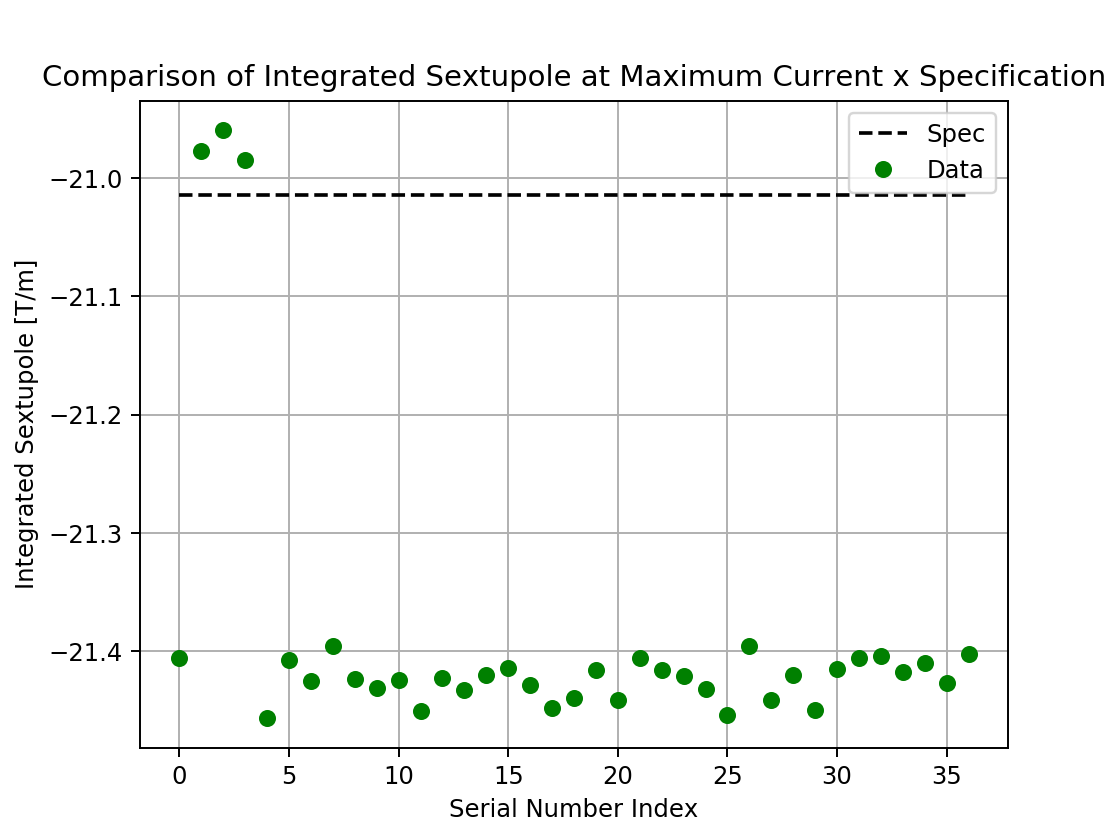

In [25]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


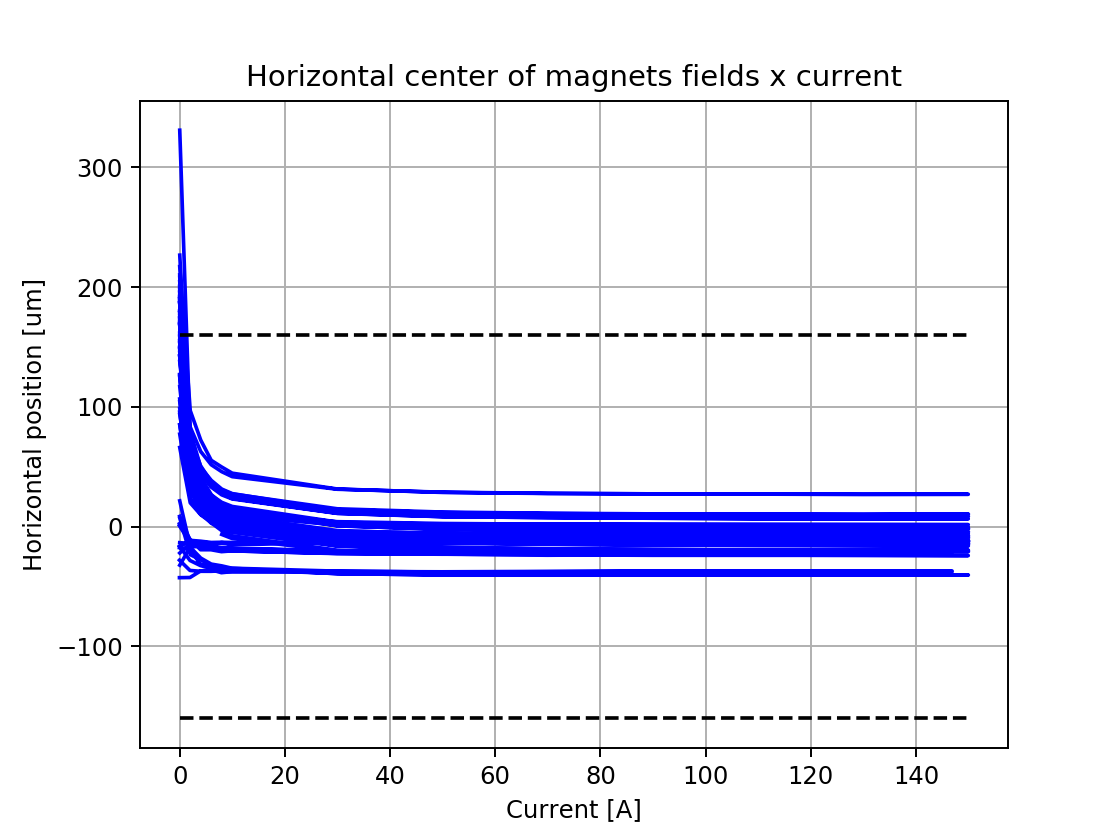

Horizontal center at maximum current [um]: -11.17 ± 12.98


<IPython.core.display.Javascript object>


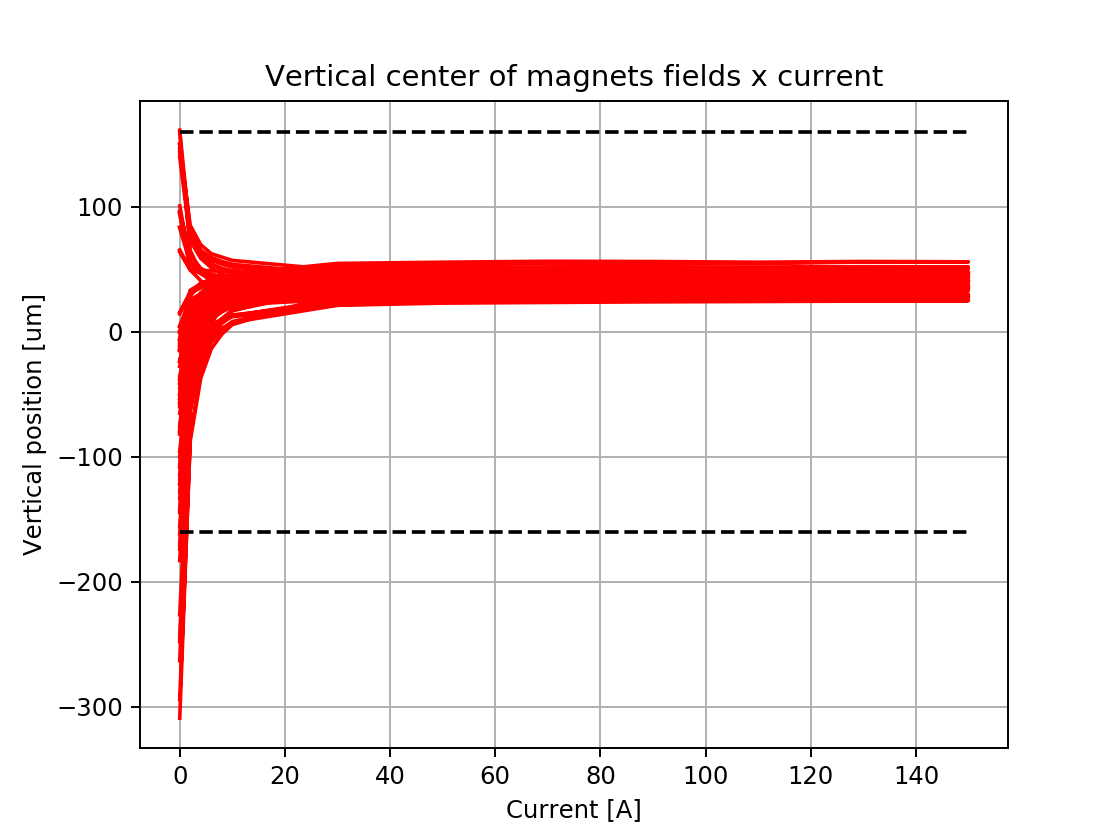

Vertical center at maximum current [um]: +39.01 ± 7.63


In [27]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M2', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M2', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


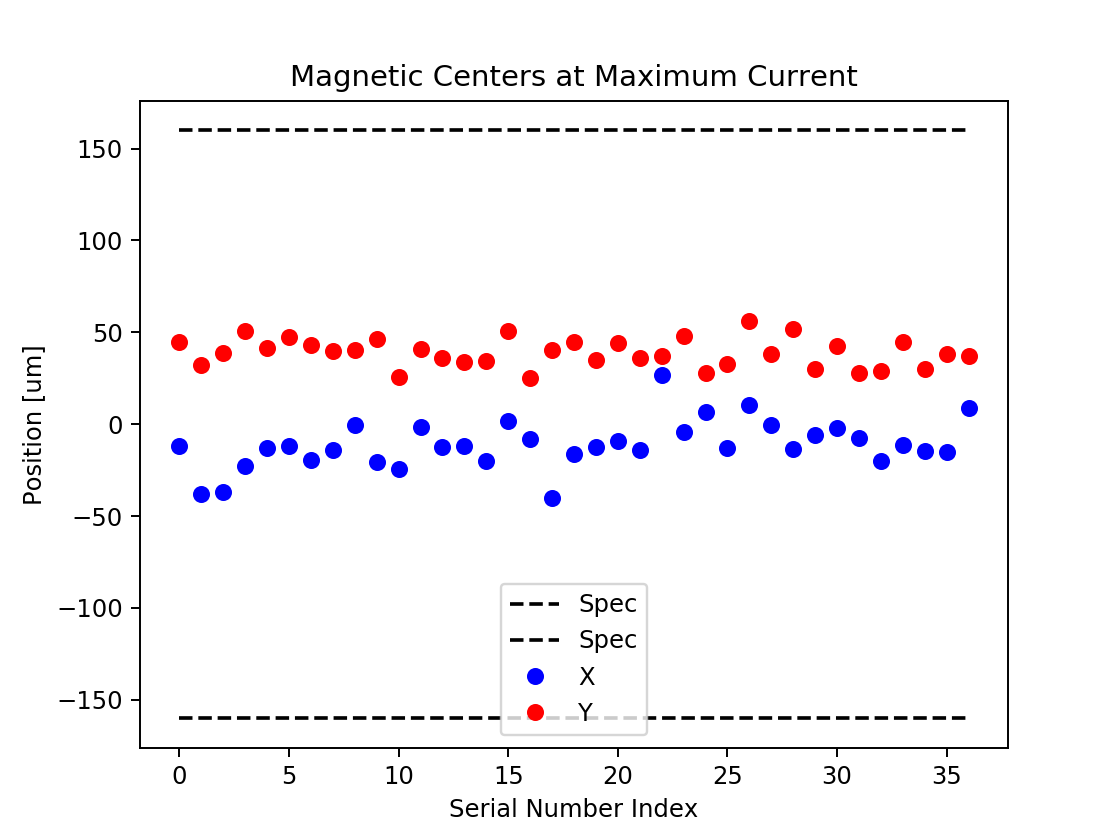

<IPython.core.display.Javascript object>


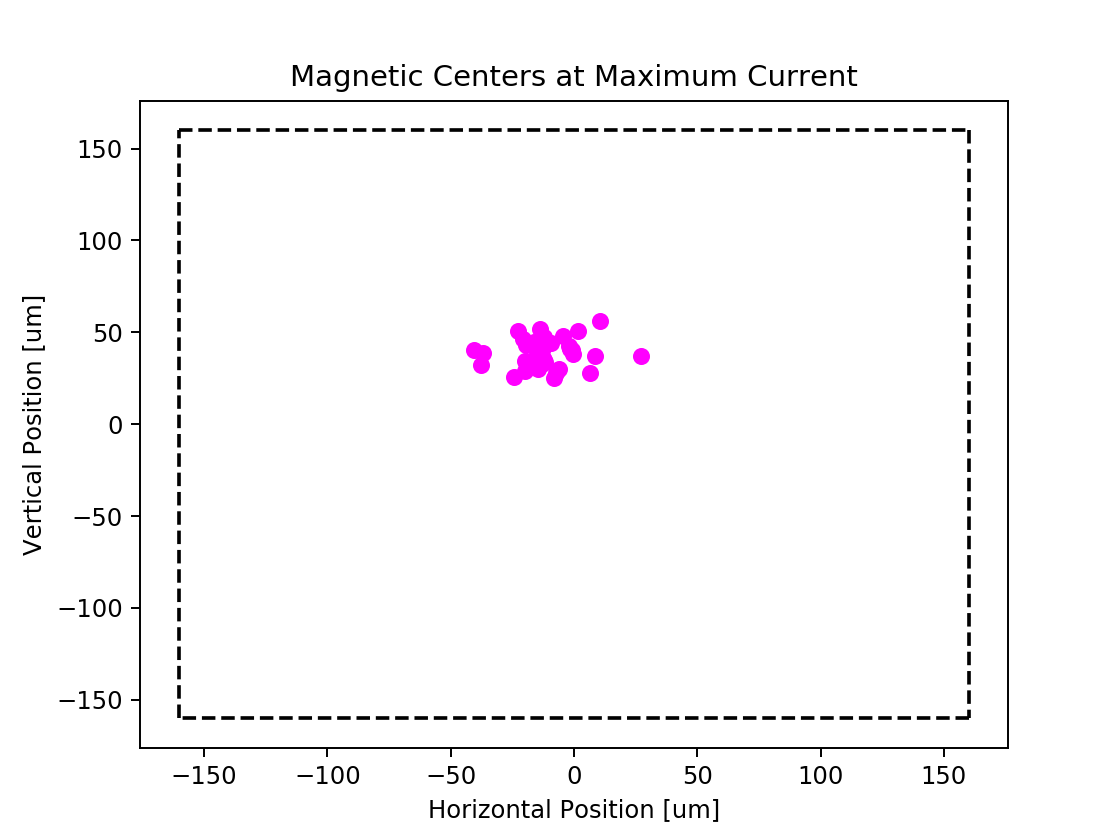

In [28]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M2', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M2', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


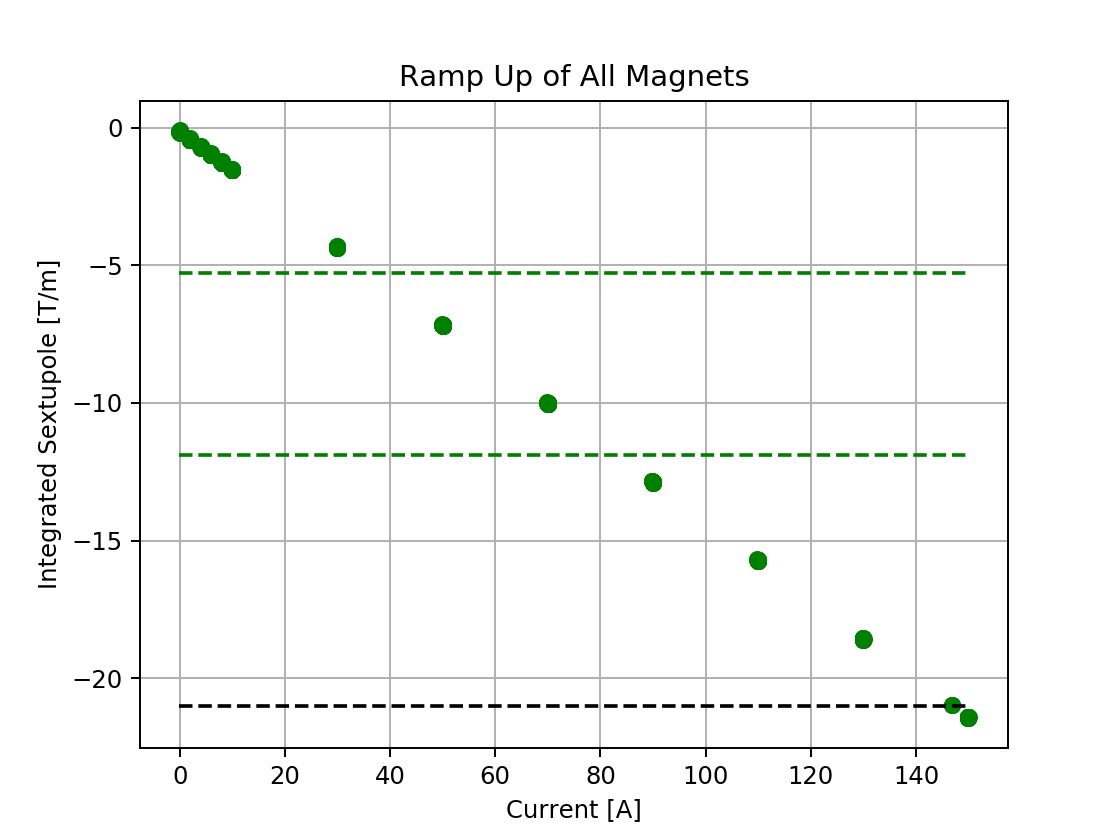

Nominal Integrated Sextupole [T/m]:
BO-Fam:MA-SF    : -11.906751
BO-Fam:MA-SD    : -5.262022

BO-Fam:MA-SF   : 083.2 A
BO-Fam:MA-SD   : 036.5 A


In [29]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M2', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(3.0)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M2', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


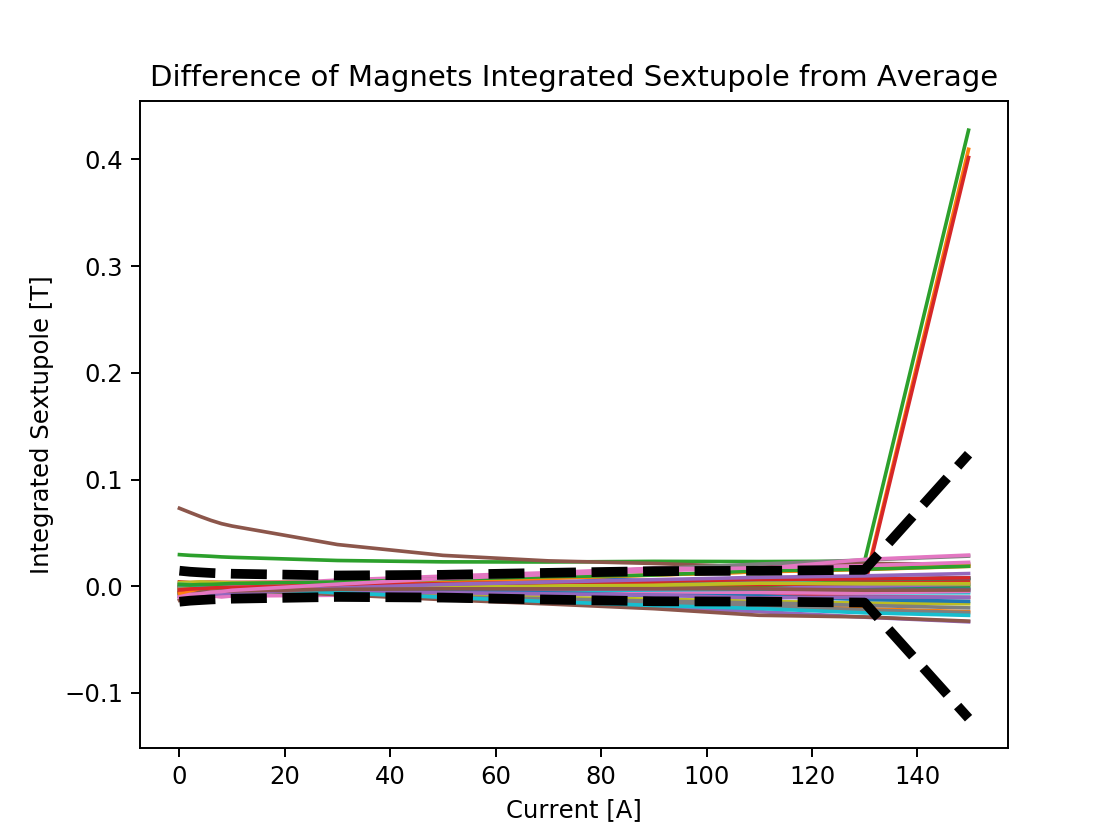

(37, 13)


In [30]:
# Plot rampup dispersion amongst magnets

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M2', plt)
plt.show()

In [31]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M2')

current 00:   +0.006 [A], rms_error:  8.9212 [%], max_error: 44.8625 [%]
current 01:   +2.007 [A], rms_error:  3.1121 [%], max_error: 15.6223 [%]
current 02:   +4.003 [A], rms_error:  1.8238 [%], max_error:  9.0266 [%]
current 03:   +5.998 [A], rms_error:  1.2566 [%], max_error:  6.1278 [%]
current 04:   +7.994 [A], rms_error:  0.9478 [%], max_error:  4.5335 [%]
current 05:   +9.991 [A], rms_error:  0.7578 [%], max_error:  3.5693 [%]
current 06:  +29.976 [A], rms_error:  0.2310 [%], max_error:  0.8397 [%]
current 07:  +49.977 [A], rms_error:  0.1487 [%], max_error:  0.5179 [%]
current 08:  +69.981 [A], rms_error:  0.1248 [%], max_error:  0.4091 [%]
current 09:  +89.974 [A], rms_error:  0.1096 [%], max_error:  0.3350 [%]
current 10: +109.976 [A], rms_error:  0.0920 [%], max_error:  0.2498 [%]
current 11: +129.977 [A], rms_error:  0.0826 [%], max_error:  0.1850 [%]
current 12: +149.699 [A], rms_error:  0.5784 [%], max_error:  1.9983 [%]


<IPython.core.display.Javascript object>


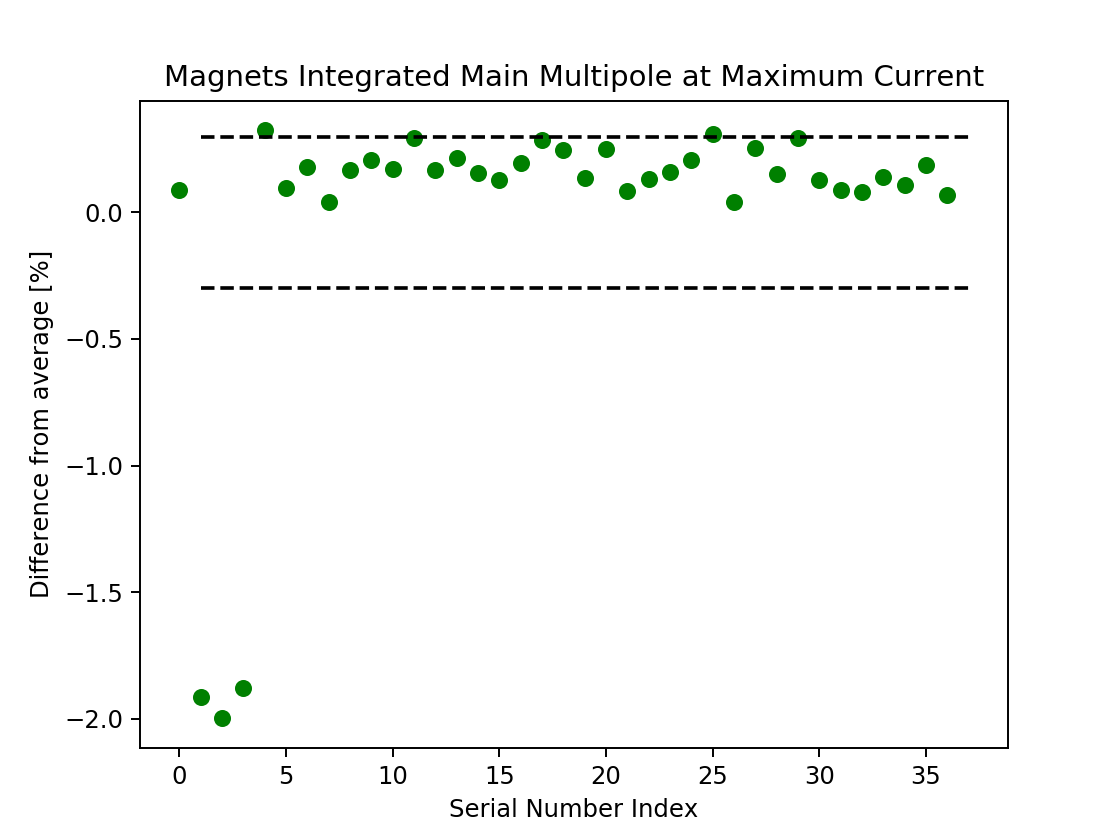

In [32]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


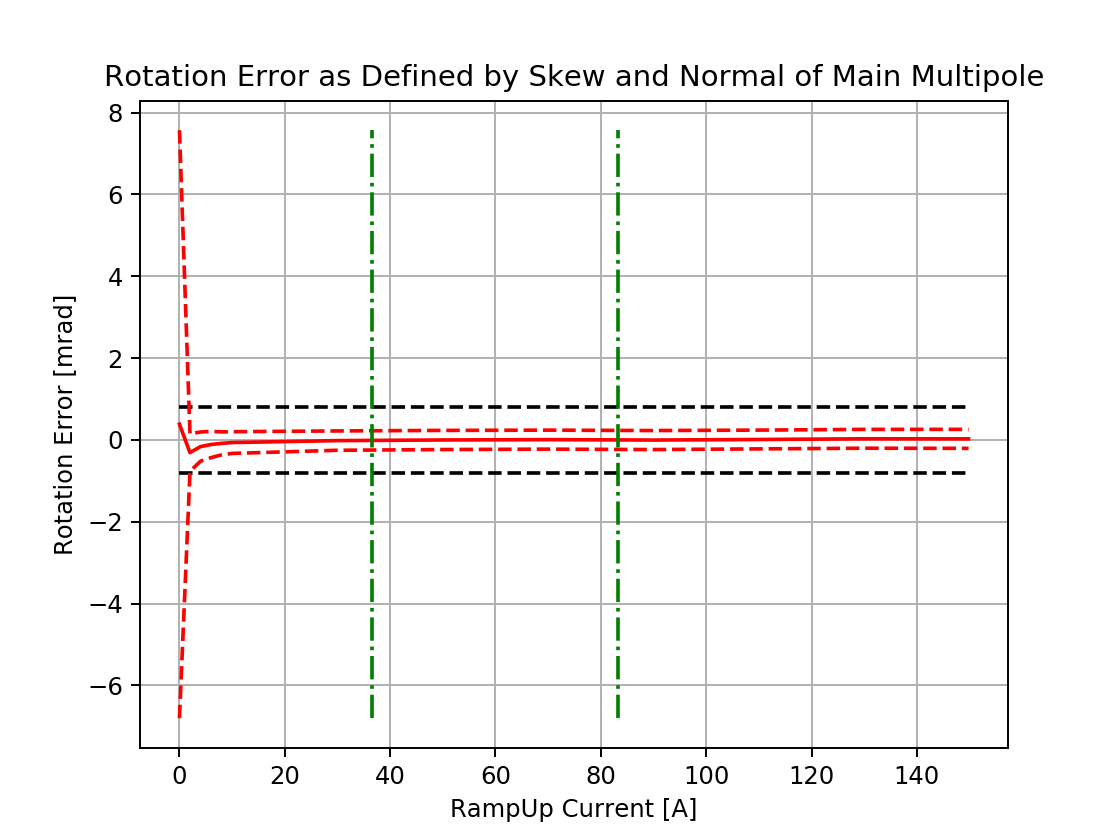

Currents for nominal strengths:
BO-Fam:MA-SD: 36.5 A
BO-Fam:MA-SF: 83.2 A


<IPython.core.display.Javascript object>


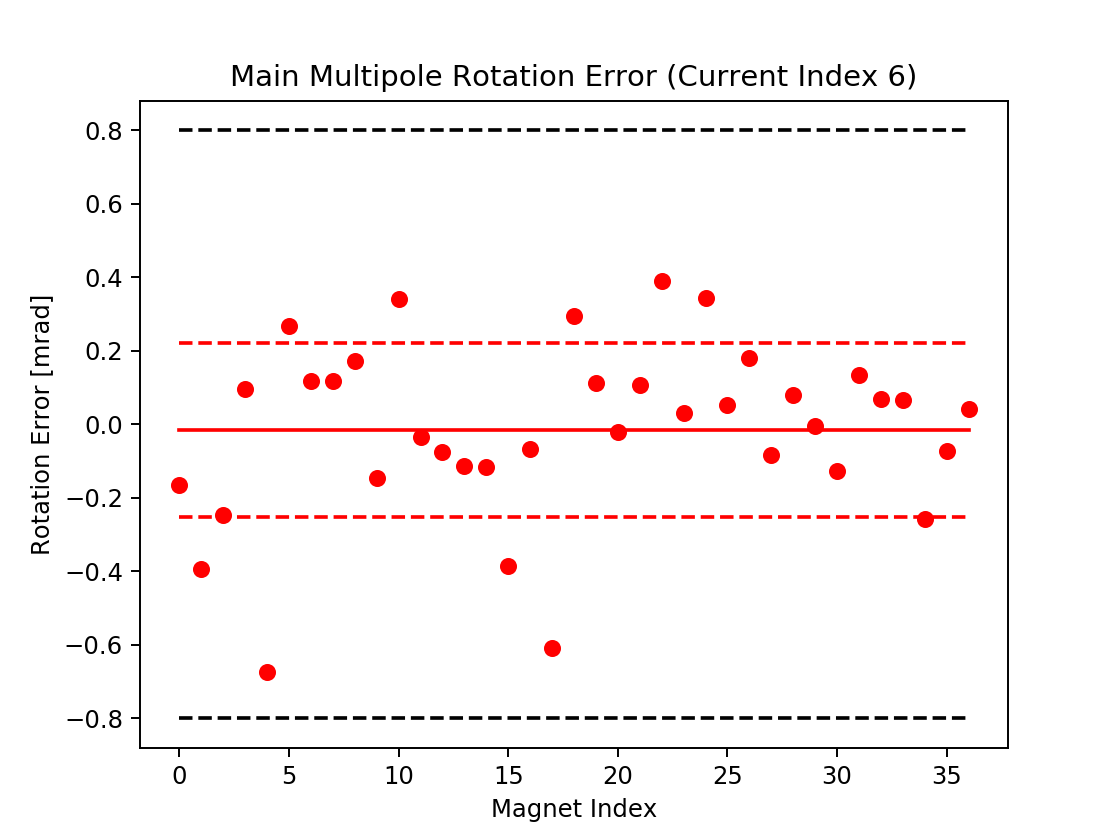

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.016 mrad
Angle error (Std) : +0.236 mrad


<IPython.core.display.Javascript object>


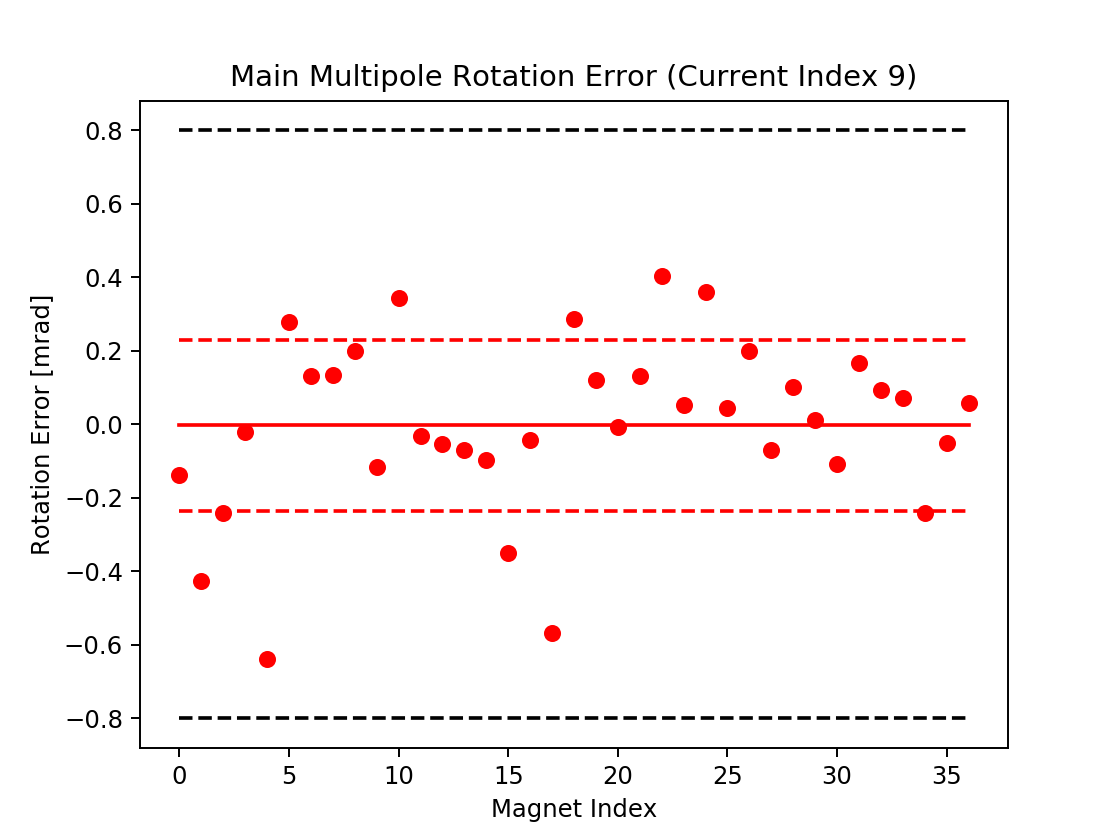

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.003 mrad
Angle error (Std) : +0.232 mrad


In [7]:
plt.figure()
data.rotation_error_vs_current_plot('M2', 3.0, plt)
plt.show()

curr_idx = [6, 9]  
for i in curr_idx:
    plt.figure()
    spec, avg, std = data.rotation_error_plot('M2', plt, i)
    plt.show()
    print('Angle error (Spec): {:+.3f} mrad'.format(spec))
    print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
    print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


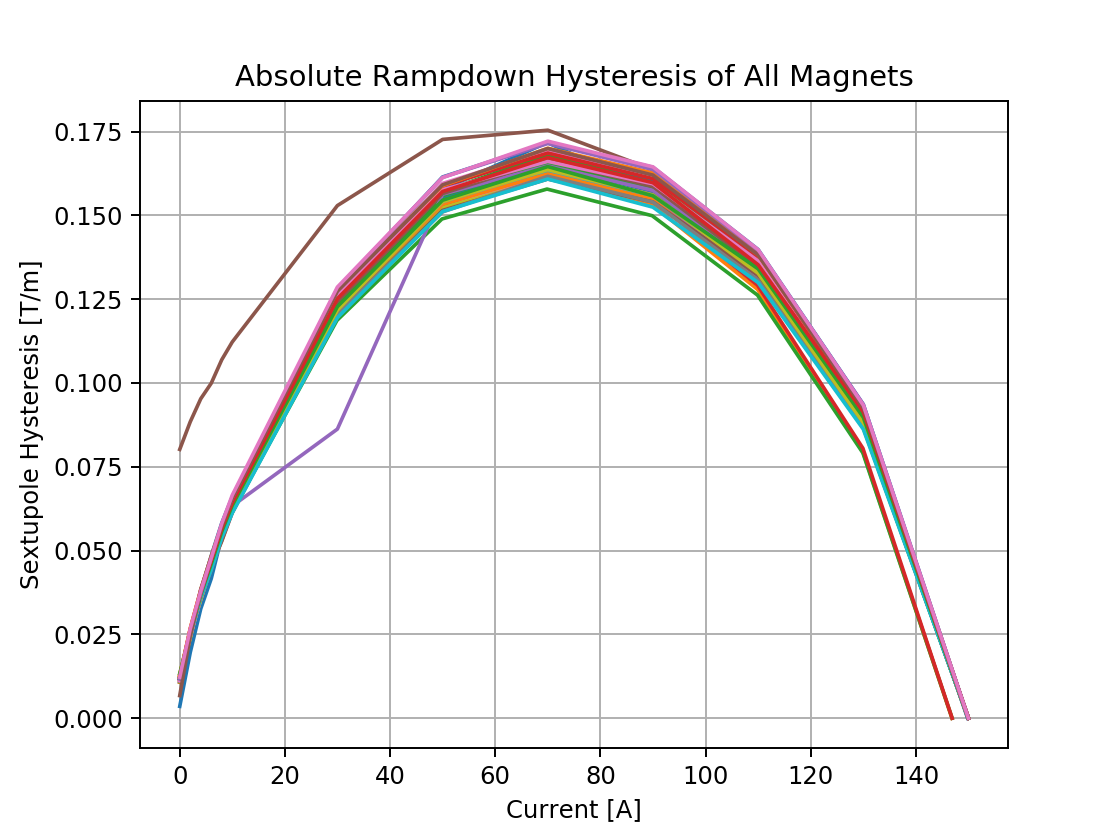

<IPython.core.display.Javascript object>


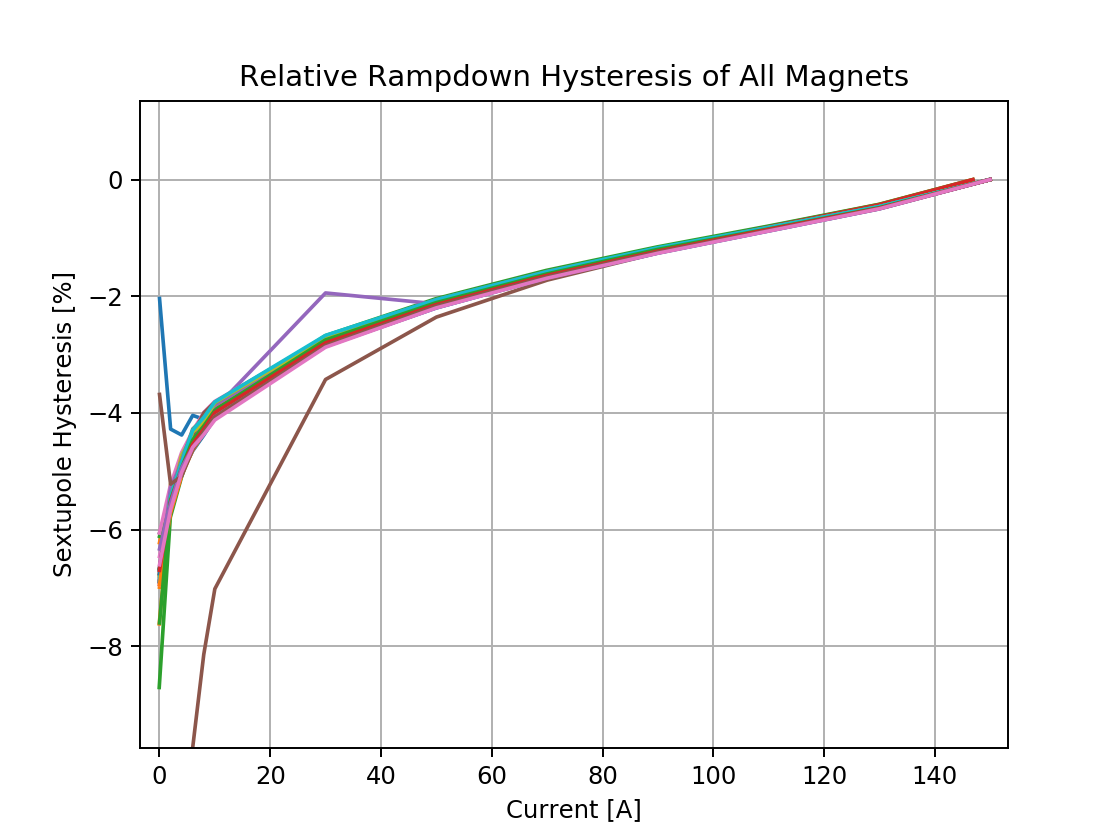

In [5]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M2', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M2', plt)
plt.show()

## Multipoles

<IPython.core.display.Javascript object>


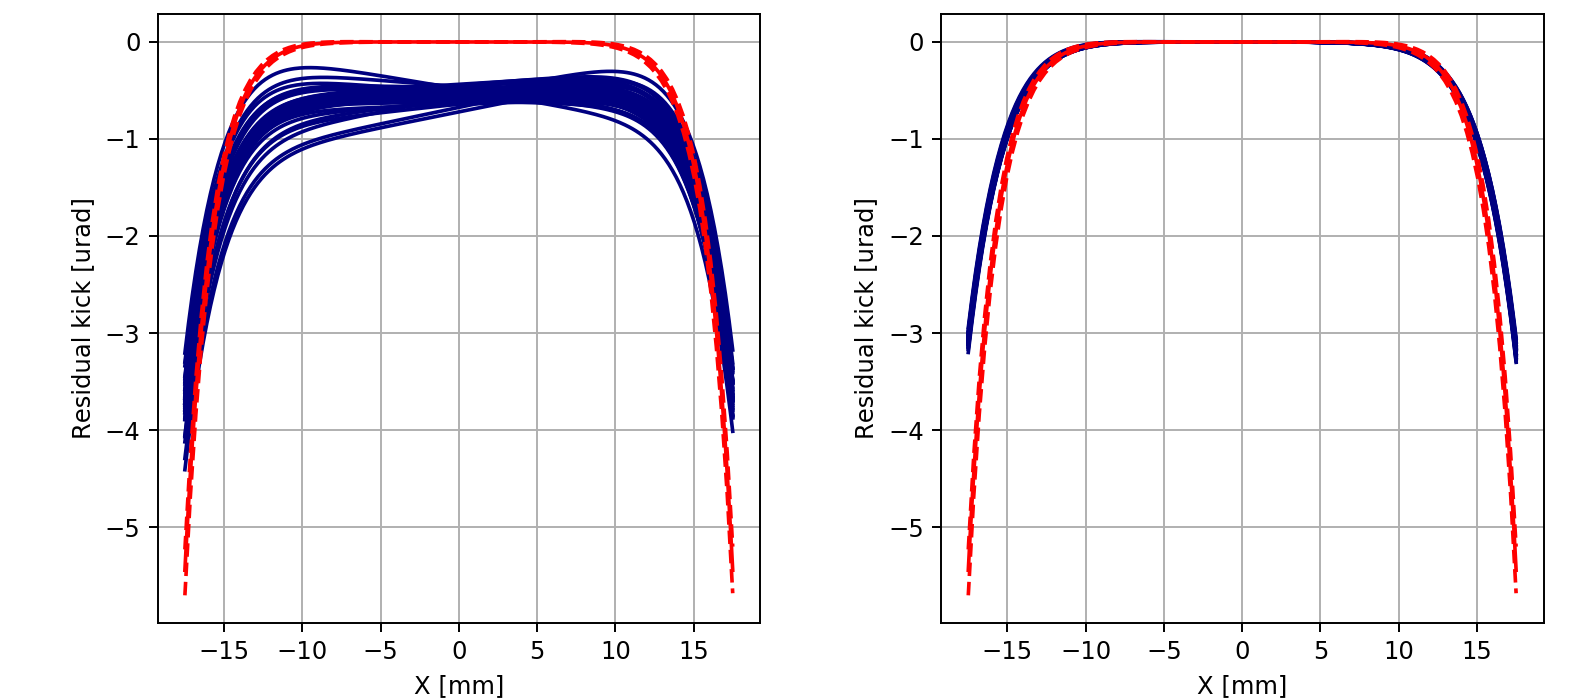

<IPython.core.display.Javascript object>


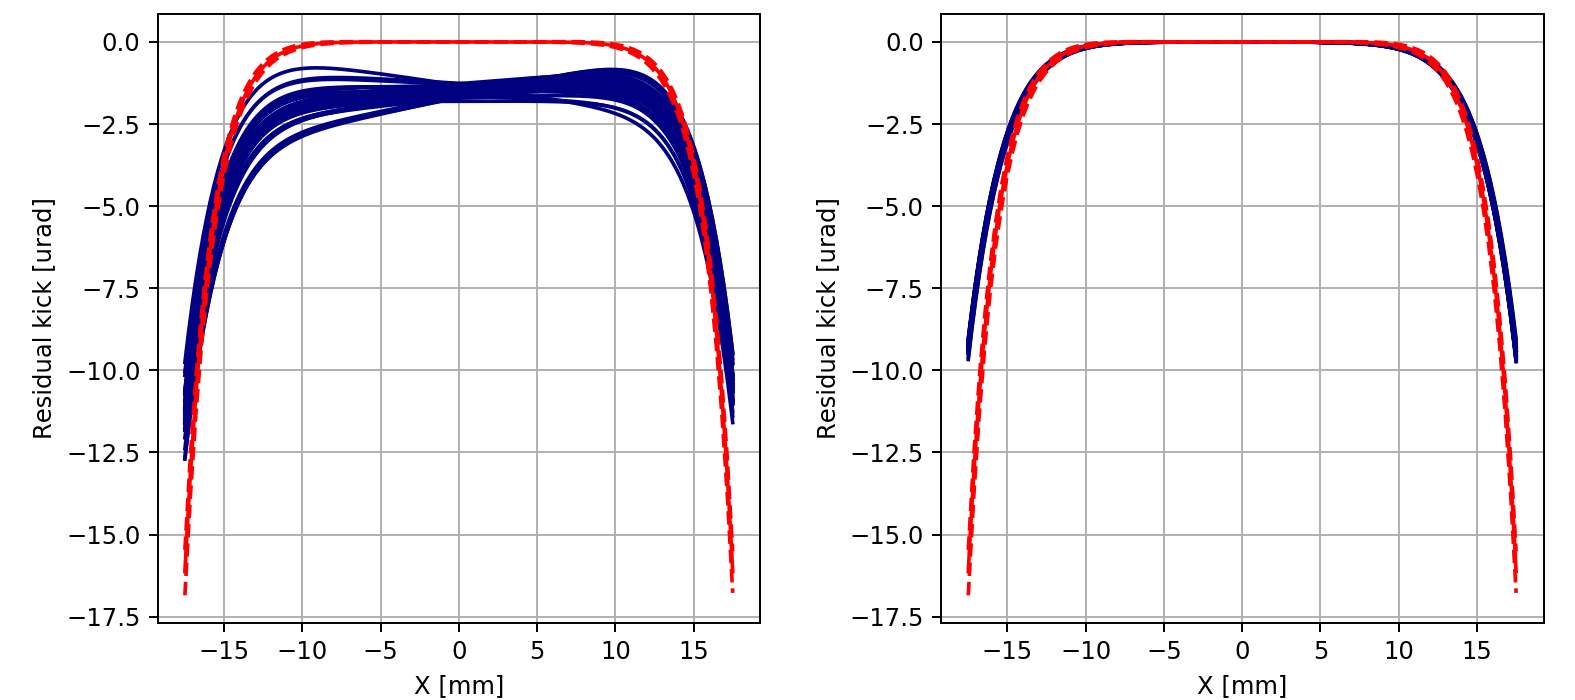

In [8]:
# Horizontal kick

curr_idx = [6, 9]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M2', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(3,),
                                     excluded_monomials_plot2=(1,2,3,))
    plt.show()

<IPython.core.display.Javascript object>


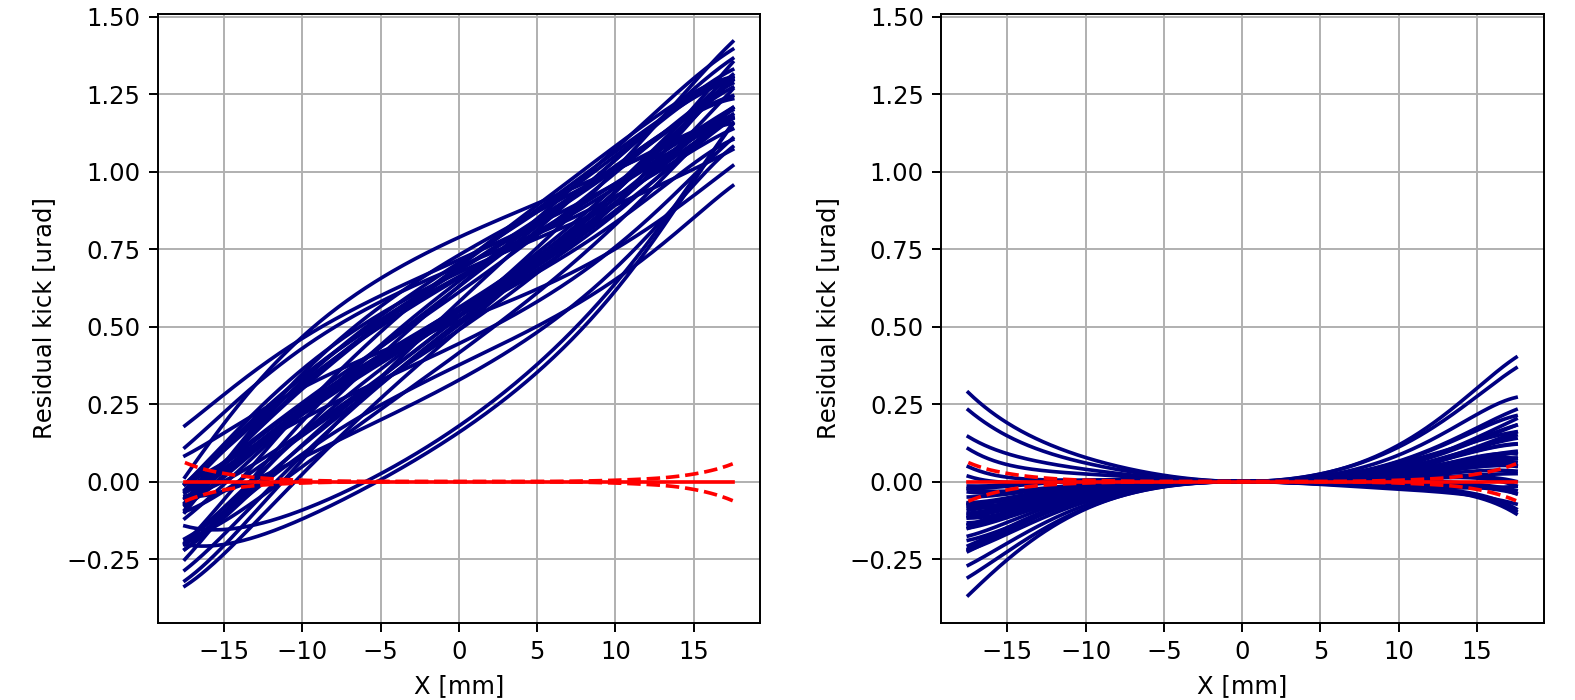

<IPython.core.display.Javascript object>


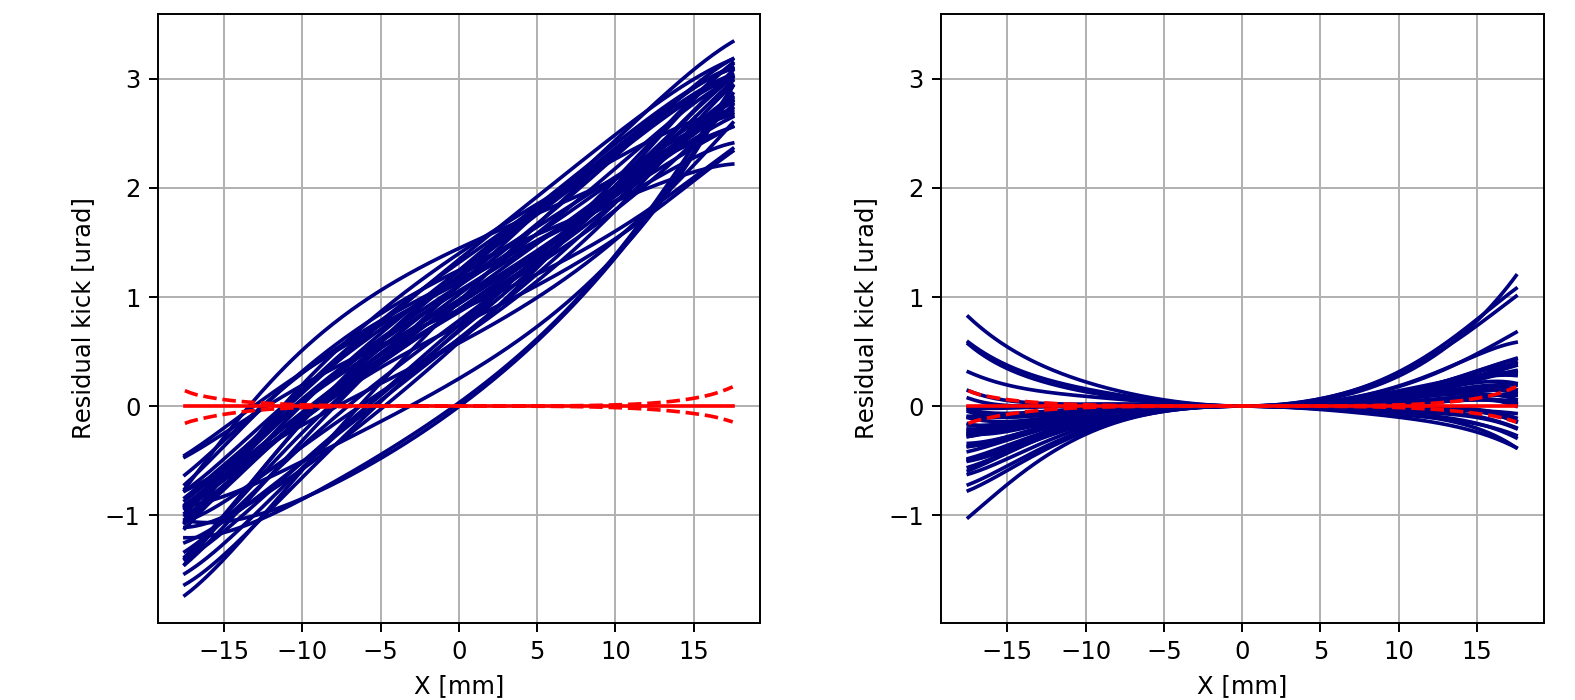

In [10]:
# Vertical kick

curr_idx = [6, 9]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M2', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(),
                                     excluded_monomials_plot2=(1,2,))
    plt.show()

<IPython.core.display.Javascript object>


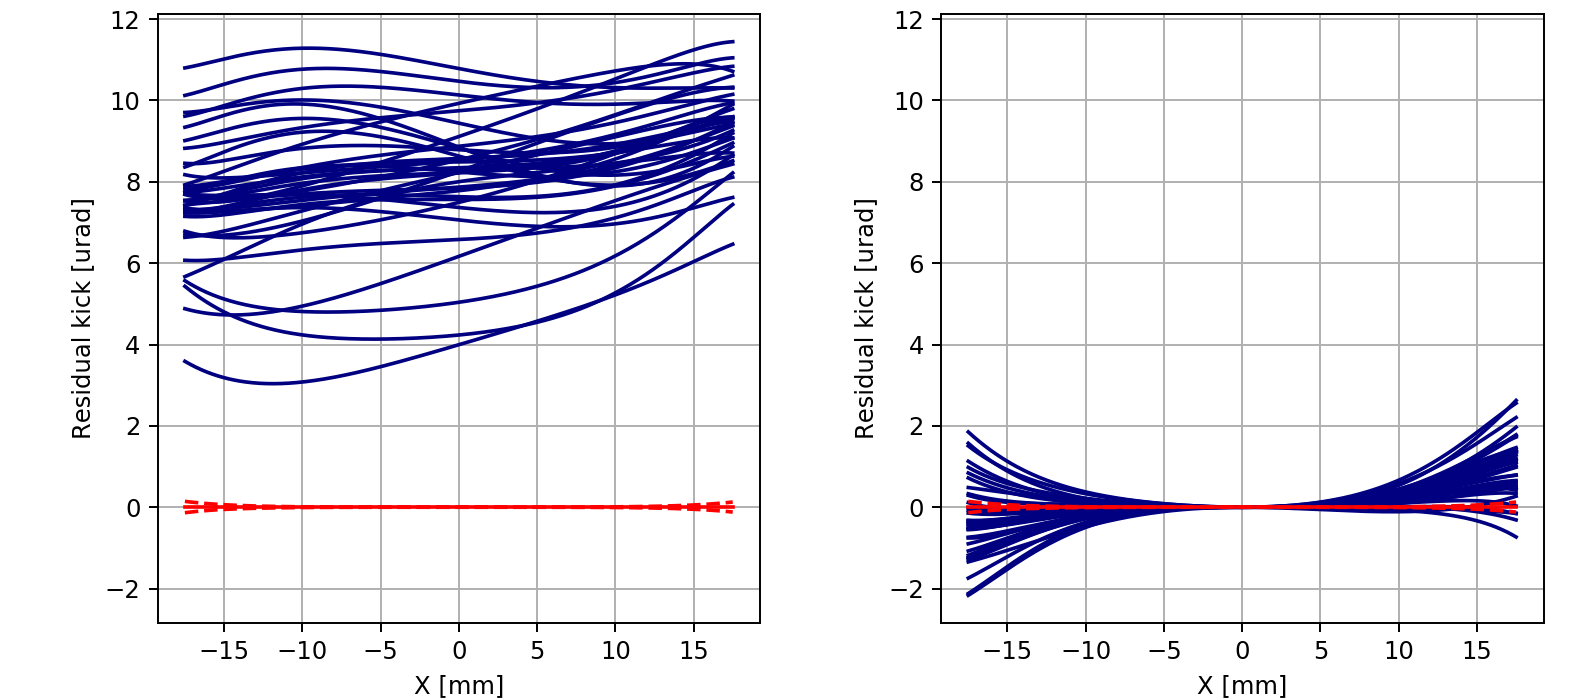

<IPython.core.display.Javascript object>


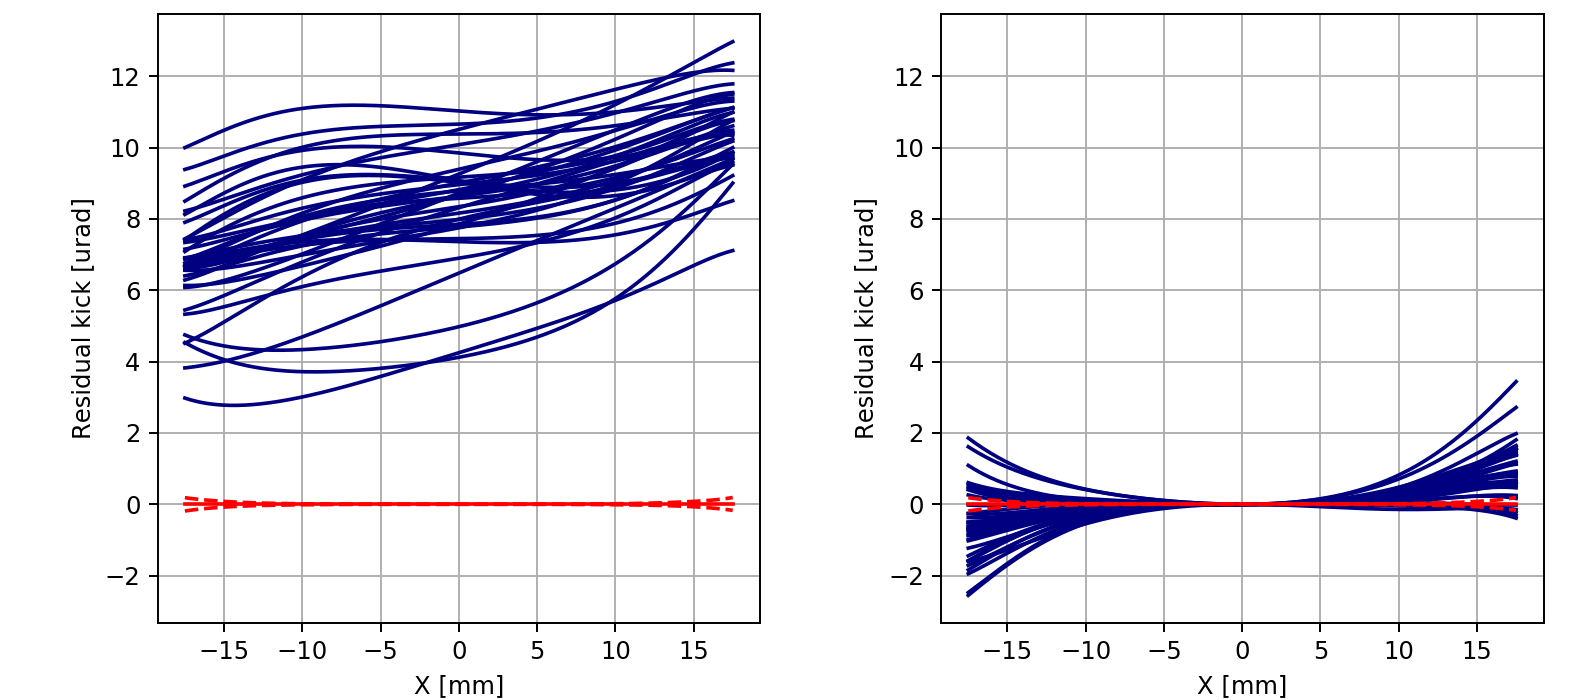

In [4]:
curr_idx = [1, 2]

for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M2', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(),
                                     excluded_monomials_plot2=(1,2,))
    plt.show()

<IPython.core.display.Javascript object>


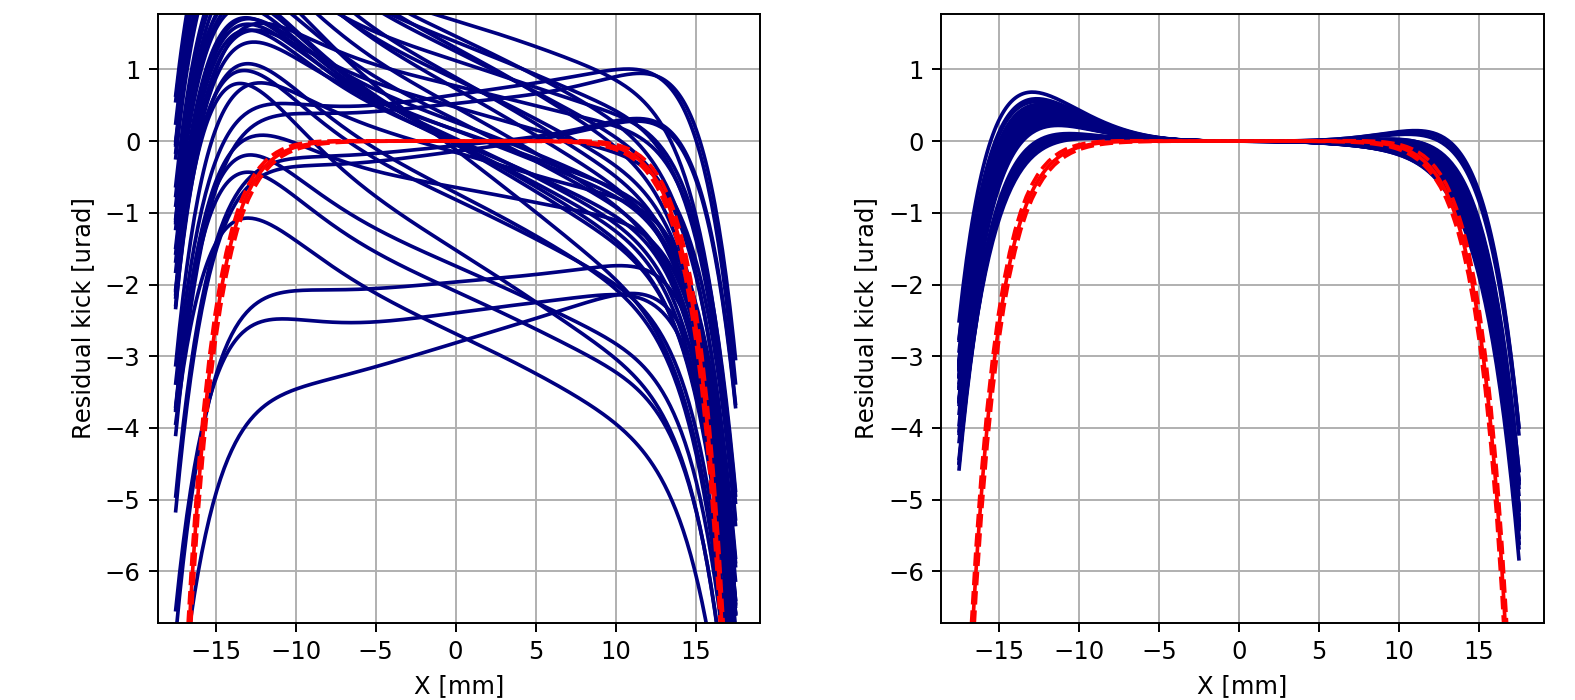

<IPython.core.display.Javascript object>


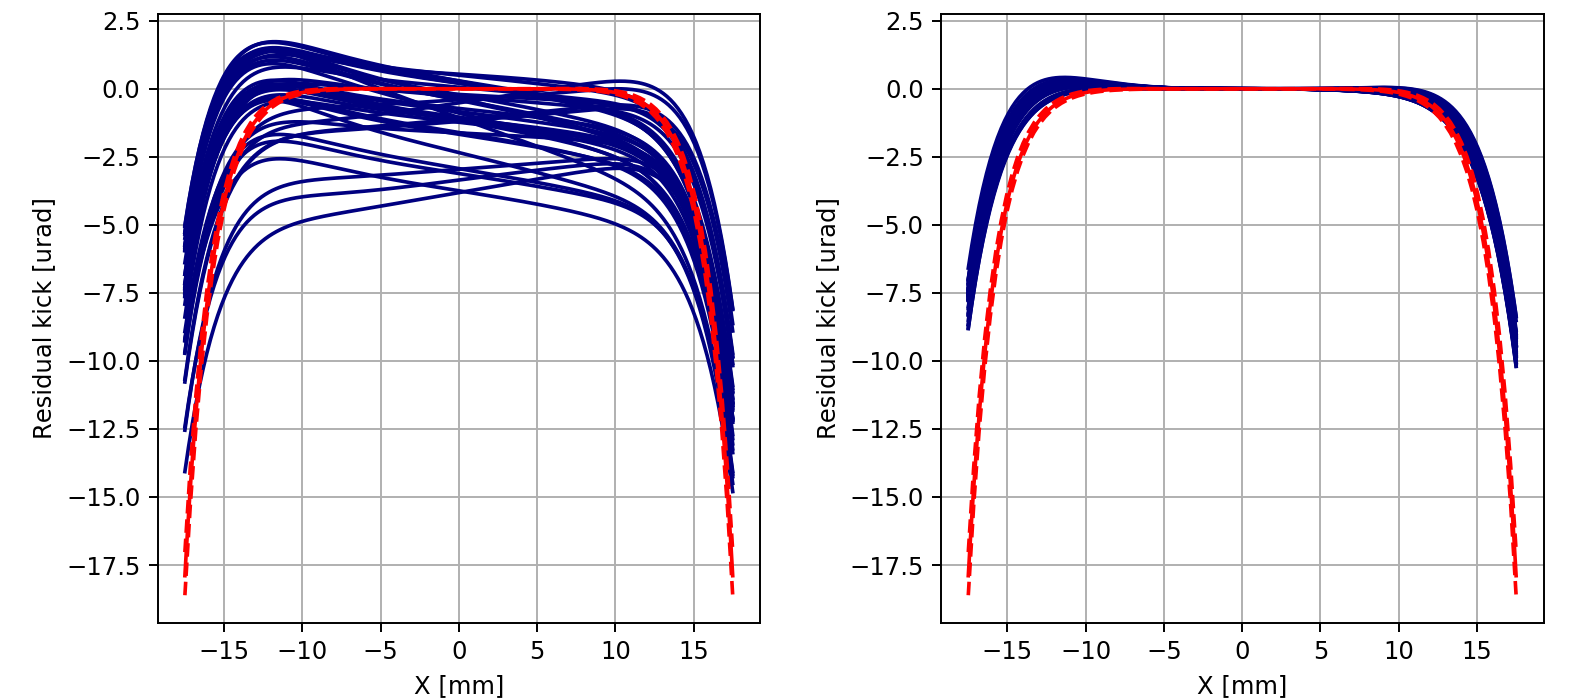

In [5]:
# Horizontal kick

curr_idx = [1, 2]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M2', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(3,),
                                     excluded_monomials_plot2=(1,2,3,))
    plt.show()

# Magnets Sorting

In [12]:
med = 'M2'
print('Rampup')
c, sl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => SL = {:+.4f} T'.format(i, c[i], sl[i]))

Rampup
00: I =   0.0163 A => SL = -0.1698 T
01: I =   2.0173 A => SL = -0.4398 T
02: I =   4.0102 A => SL = -0.7130 T
03: I =   6.0012 A => SL = -0.9882 T
04: I =   7.9990 A => SL = -1.2627 T
05: I =   9.9951 A => SL = -1.5403 T
06: I =  29.9500 A => SL = -4.3392 T
07: I =  49.9283 A => SL = -7.1651 T
08: I =  69.9174 A => SL = -10.0032 T
09: I =  89.8660 A => SL = -12.8530 T
10: I = 109.9009 A => SL = -15.7074 T
11: I = 129.9440 A => SL = -18.5672 T
12: I = 149.8056 A => SL = -21.4056 T


In [13]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M2')
stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('MULTIPOLES-{:.0f}A.txt'.format(currents[cidx]), 'w')
    data.readme_multipoles_print('M2', cidx)
    sys.stdout.flush()
sys.stdout = stdout